# TWO:
###  1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

In [18]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [3]:
echo_dot_review = []

## Conneecting to Amazon and downloading reviews

In [11]:
for i in range (1,50):
    op=[]
    url ="https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    echo_dot_review = echo_dot_review+op

## Downloading review from Amazon.in for Echo Dot (3rd Gen) - Smart speaker with Alexa (Black)

In [12]:
echo_dot_review = list(set(echo_dot_review))

## Text Pre-Processing

In [13]:
txt = ' '.join(echo_dot_review)
txt

" \nConnecting issue\n \nI like this product very much it's so intertaing and knowledgeable we know about wheather and current affairs and all gernal questions  and calculation is so helpful for us\n \nVery good\n \n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0Buy it\n \n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0Absolute great, vocals are more crispier than before, sounds slight lesser in DB … obviously doesn’t respond through walls. Perfectly works with jio 5g @100/mbpsHighly recommended… I see someone has an appeal, asking Amazon to reduce price, & in comparison to other brands.. also tracking Amazon prices ate fluctuating; FYI this Alexa is actually underrated & Amazon is selling already at a loss. I.e. only for a research program gathering user information to improve the newer generation.Hope people should extend knowledge and ask something logical\n \nGreat device, sound quality is decent. Wor

In [14]:
# Text Cleaning
txt = re.sub('[^a-zA-z0-9]',' ',txt)
txt.lower()

'  connecting issue   i like this product very much it s so intertaing and knowledgeable we know about wheather and current affairs and all gernal questions  and calculation is so helpful for us   very good                           the media could not be loaded                       buy it                           the media could not be loaded                       absolute great  vocals are more crispier than before  sounds slight lesser in db   obviously doesn t respond through walls  perfectly works with jio 5g  100 mbpshighly recommended  i see someone has an appeal  asking amazon to reduce price    in comparison to other brands   also tracking amazon prices ate fluctuating  fyi this alexa is actually underrated   amazon is selling already at a loss  i e  only for a research program gathering user information to improve the newer generation hope people should extend knowledge and ask something logical   great device  sound quality is decent  works as expected    i still don t und

In [20]:
# text Cleaning 
txt = txt.strip()
txt

'Connecting issue   I like this product very much it s so intertaing and knowledgeable we know about wheather and current affairs and all gernal questions  and calculation is so helpful for us   Very good                           The media could not be loaded                       Buy it                           The media could not be loaded                       Absolute great  vocals are more crispier than before  sounds slight lesser in DB   obviously doesn t respond through walls  Perfectly works with jio 5g  100 mbpsHighly recommended  I see someone has an appeal  asking Amazon to reduce price    in comparison to other brands   also tracking Amazon prices ate fluctuating  FYI this Alexa is actually underrated   Amazon is selling already at a loss  I e  only for a research program gathering user information to improve the newer generation Hope people should extend knowledge and ask something logical   Great device  sound quality is decent  Works as expected    I still don t under

In [19]:
txt_token = word_tokenize(txt)
print(txt_token)

['Connecting', 'issue', 'I', 'like', 'this', 'product', 'very', 'much', 'it', 's', 'so', 'intertaing', 'and', 'knowledgeable', 'we', 'know', 'about', 'wheather', 'and', 'current', 'affairs', 'and', 'all', 'gernal', 'questions', 'and', 'calculation', 'is', 'so', 'helpful', 'for', 'us', 'Very', 'good', 'The', 'media', 'could', 'not', 'be', 'loaded', 'Buy', 'it', 'The', 'media', 'could', 'not', 'be', 'loaded', 'Absolute', 'great', 'vocals', 'are', 'more', 'crispier', 'than', 'before', 'sounds', 'slight', 'lesser', 'in', 'DB', 'obviously', 'doesn', 't', 'respond', 'through', 'walls', 'Perfectly', 'works', 'with', 'jio', '5g', '100', 'mbpsHighly', 'recommended', 'I', 'see', 'someone', 'has', 'an', 'appeal', 'asking', 'Amazon', 'to', 'reduce', 'price', 'in', 'comparison', 'to', 'other', 'brands', 'also', 'tracking', 'Amazon', 'prices', 'ate', 'fluctuating', 'FYI', 'this', 'Alexa', 'is', 'actually', 'underrated', 'Amazon', 'is', 'selling', 'already', 'at', 'a', 'loss', 'I', 'e', 'only', 'for'

In [21]:
stop = stopwords.words('english')

In [22]:
corpus = []

for i in txt_token:
    if i not in stop:
        corpus.append(i)

In [23]:
print(corpus)

['Connecting', 'issue', 'I', 'like', 'product', 'much', 'intertaing', 'knowledgeable', 'know', 'wheather', 'current', 'affairs', 'gernal', 'questions', 'calculation', 'helpful', 'us', 'Very', 'good', 'The', 'media', 'could', 'loaded', 'Buy', 'The', 'media', 'could', 'loaded', 'Absolute', 'great', 'vocals', 'crispier', 'sounds', 'slight', 'lesser', 'DB', 'obviously', 'respond', 'walls', 'Perfectly', 'works', 'jio', '5g', '100', 'mbpsHighly', 'recommended', 'I', 'see', 'someone', 'appeal', 'asking', 'Amazon', 'reduce', 'price', 'comparison', 'brands', 'also', 'tracking', 'Amazon', 'prices', 'ate', 'fluctuating', 'FYI', 'Alexa', 'actually', 'underrated', 'Amazon', 'selling', 'already', 'loss', 'I', 'e', 'research', 'program', 'gathering', 'user', 'information', 'improve', 'newer', 'generation', 'Hope', 'people', 'extend', 'knowledge', 'ask', 'something', 'logical', 'Great', 'device', 'sound', 'quality', 'decent', 'Works', 'expected', 'I', 'still', 'understand', 'people', 'settle', '5th', 

## Feature Extraction

In [24]:
# TfIDF

tf = TfidfVectorizer()

data = tf.fit_transform(corpus)
data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
print(tf.vocabulary_)

{'connecting': 20, 'issue': 50, 'like': 56, 'product': 71, 'much': 63, 'intertaing': 49, 'knowledgeable': 54, 'know': 52, 'wheather': 104, 'current': 24, 'affairs': 7, 'gernal': 39, 'questions': 75, 'calculation': 18, 'helpful': 44, 'us': 98, 'very': 101, 'good': 41, 'the': 92, 'media': 62, 'could': 22, 'loaded': 57, 'buy': 17, 'absolute': 3, 'great': 42, 'vocals': 102, 'crispier': 23, 'sounds': 88, 'slight': 84, 'lesser': 55, 'db': 25, 'obviously': 65, 'respond': 79, 'walls': 103, 'perfectly': 68, 'works': 105, 'jio': 51, '5g': 1, '100': 0, 'mbpshighly': 61, 'recommended': 76, 'see': 80, 'someone': 85, 'appeal': 12, 'asking': 14, 'amazon': 11, 'reduce': 77, 'price': 69, 'comparison': 19, 'brands': 16, 'also': 10, 'tracking': 95, 'prices': 70, 'ate': 15, 'fluctuating': 34, 'fyi': 35, 'alexa': 8, 'actually': 4, 'underrated': 96, 'selling': 81, 'already': 9, 'loss': 59, 'research': 78, 'program': 72, 'gathering': 36, 'user': 99, 'information': 47, 'improve': 46, 'newer': 64, 'generation'

In [26]:
df = pd.DataFrame(data.toarray(), columns=tf.get_feature_names_out())
df

,100,5g,5th,absolute,actually,advertisements,advised,affairs,alexa,already,...,underrated,understand,us,user,utility,very,vocals,walls,wheather,works
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
words = ' '.join(df)

In [29]:
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200

Text(0.5, 1.0, 'WordCloud')

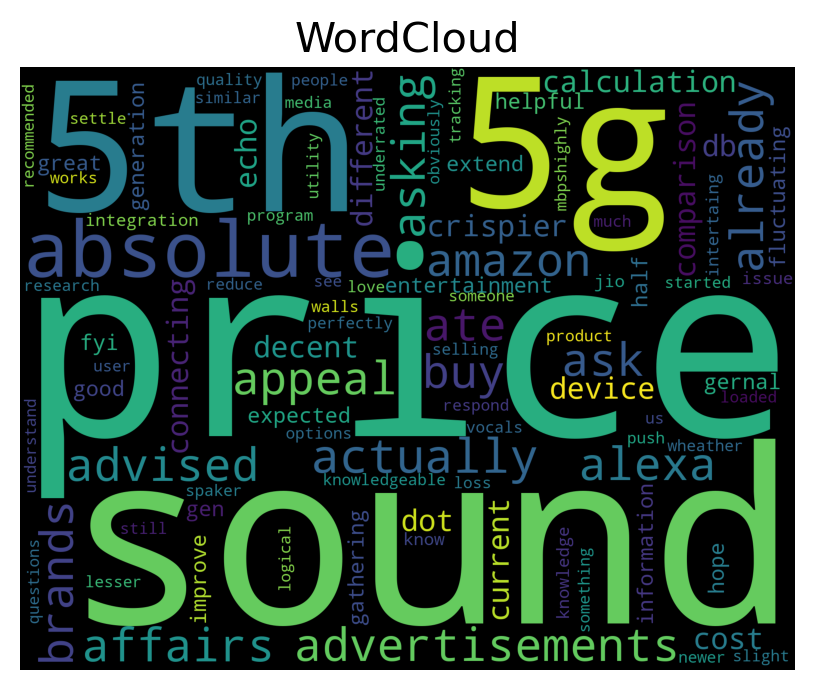

In [31]:
wordcloud = WordCloud(background_color='black', width=1800, height=1400).generate(words)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('WordCloud', size=15)

 ## Sentiment Analysis

In [32]:
with open ('positive-words.txt') as p:
    positive = p.read().split("\n")

In [33]:
positive = positive[35:]
positive

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [34]:
len(positive)

2007

In [35]:
with open('negative-words.txt','r', encoding='latin') as n:
    negative = n.read().split('\n')

In [46]:
negative = negative[36:]
negative

['accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',
 'aggravating',
 'aggravation',
 'aggression',
 'aggressive',
 'aggressiveness',
 'aggressor',
 'aggrieve',
 'aggrieved',
 'aggrivation',
 'aghast',
 'agonies',
 'agonize',
 'agonizing',
 'agonizingly',
 'agony',
 'aground',
 'ail',
 'ailing',
 'ailment',
 'aimless',
 'alarm',
 'alarmed',
 'alarming',
 'alarmingly',
 'alienate',
 'alienated',
 'alienation',
 'allegation',
 'allegations',
 'allege',
 'allergic',
 'allergies',
 'allergy',
 'alo

In [47]:
len(negative)

4747

## Negative Wordcloud

In [48]:
negative_txt = ' '.join([word for word in df if word in negative])

Text(0.5, 1.0, 'Negative-WordCloud')

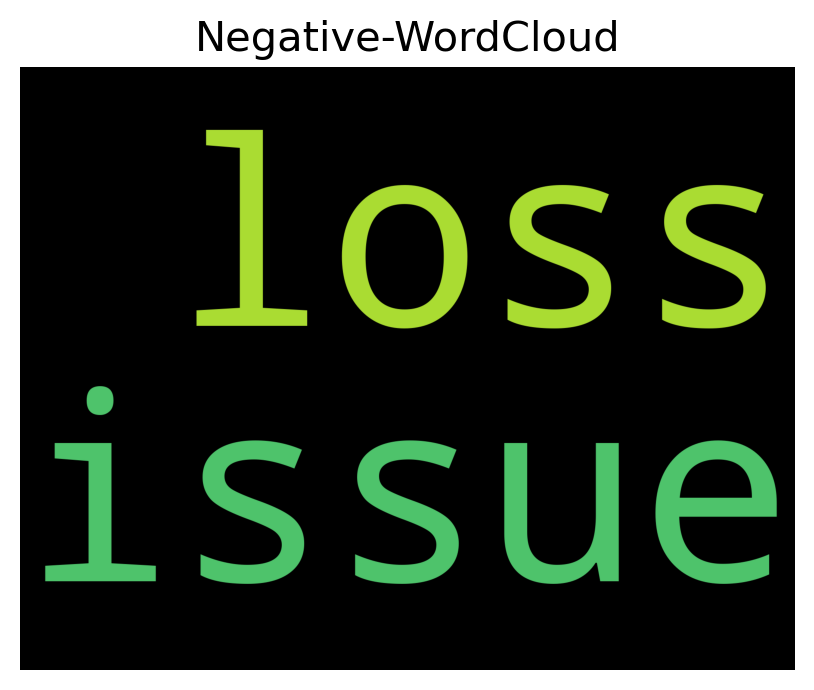

In [49]:
negative_wordcloud = WordCloud(background_color='black', width=1800, height=1400).generate(negative_txt)
plt.axis('off')
plt.imshow(negative_wordcloud)
plt.title('Negative-WordCloud', size=15)

## Positive Wordcloud

In [50]:
positive_txt = ' '.join([word for word in df if word in positive])

Text(0.5, 1.0, 'Positive-WordCloud')

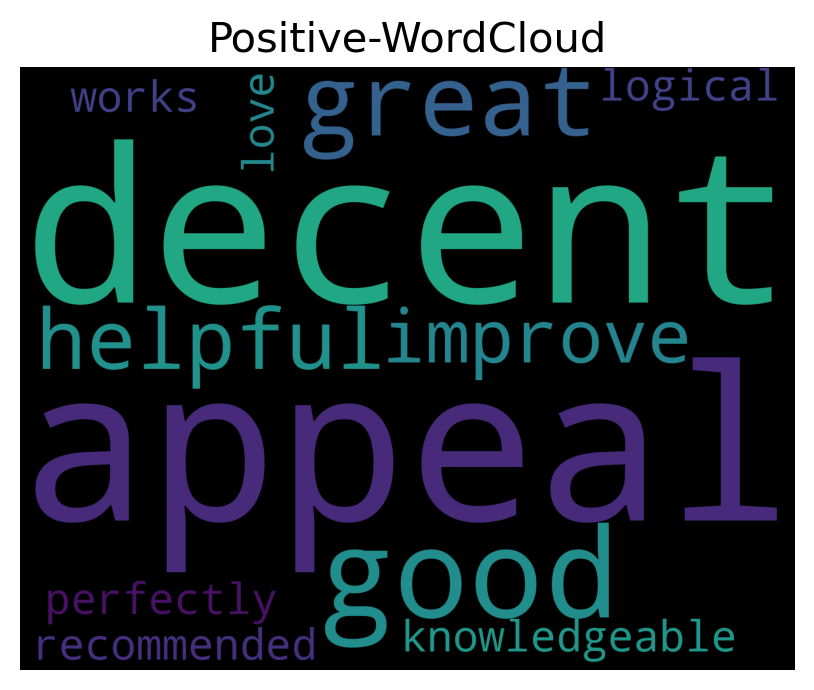

In [52]:
positive_wordcloud = WordCloud(background_color='black', width=1800, height=1400).generate(positive_txt)
plt.axis('off')
plt.imshow(positive_wordcloud)
plt.title('Positive-WordCloud', size=15)